# Solving Non Linear Problems

In lesson 04, you were able to figure out how to solve a basic Linear Regression problem with a simple NN. In this lesson, I am going to introduce you to ***Activation functions***. You are also going to create a NN with a hidden layer.

> What is the purpose of an activation Function?  

Activation Functions allow your NN to model non linear problems. All of your NNs in the previous lessons have NOT had an activation function and will not do well with non linear datasets.  

> What are some of the common activation functions?  

* Sigmoid  
* Tanh  
* ReLU (most popular)  

# Let's Get to Work! 

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.3 |Anaconda, Inc.| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Tensorflow version 1.1.0
Pandas version 0.20.3
Numpy version 1.12.1


# Function to model

    y = a * x^2 + b * x + c

In [3]:
# let's generate 1000 random sample
pool = np.random.rand(1000,1).astype(np.float32)

# Shuffle samples
np.random.shuffle(pool)

# sample size of 15%
sample = int(1000 * 0.15)

# 15% test
test_x = pool[0:sample]

# 85% train
train_x = pool[sample:]

print("Test sample size:",test_x.shape)
print("Training sample size:",train_x.shape)

test_y = 2.0 * test_x**2 + 3.0 * test_x + 5
train_y = 2.0 * train_x**2 + 3.0 * train_x + 5

Test sample size: (150, 1)
Training sample size: (850, 1)


In [4]:
df = pd.DataFrame({
    'x':train_x[:,0],
    'y':train_y[:,0]
})
df.head()

,x,y
0,0.680756,7.969127
1,0.996621,9.976369
2,0.272934,5.967790
3,0.870633,9.127904
4,0.989352,9.925688


In [5]:
df.describe()

,x,y
count,850.000000,850.000000
mean,0.488712,7.107802
std,0.286515,1.440690
min,0.001570,5.004716
25%,0.237953,5.827101
50%,0.477152,6.886806
75%,0.726525,8.235250
max,0.998487,9.989411


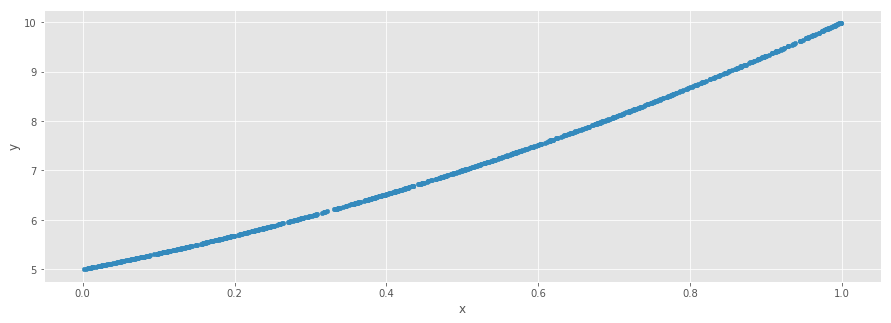

In [6]:
df.plot.scatter(x='x',y='y',figsize=[15,5])

# Model your Graph

Start to use W (for weight) and b (for bias) when setting up your variables. Aside from adding your ReLU activation function, it is a good idea to use Tensorflow's ***matrix multiplication function (matmul)*** as shown below.  

> The ? in the shape output just means it can be of any shape.

For the shape parameter, you can think of it like this...  

> shape = [how many data points do you have, how many features does each data point have]  

For this lesson since we are doing a simple regression, we only have one feature (x). We use the ***None*** keyword so that we are not restricted on the number of samples to feed our model. This will become more important when you learn about training using batches on a future lesson.

In [7]:
# you can adjust the number of neurons in the hidden layer
hidden_size = 1

# placeholders
# shape[how many sample you have, how many input neorons]
x = tf.placeholder(tf.float32,shape=[None,1],name='01_x')
y = tf.placeholder(tf.float32,shape=[None,1],name='01_y')

print('shape of x and y')
print(x.get_shape(),y.get_shape())

shape of x and y
(?, 1) (?, 1)


In [8]:
# create your first hidden layer
# tf.truncated_normal([how many samples do you have, size of output layer])
W1 = tf.Variable(tf.truncated_normal([1,hidden_size],mean=0.1,stddev=0.1),name='w1')

# tf.truncated_normal([size of output layer])
b1 = tf.Variable(tf.truncated_normal([hidden_size],mean=0.1,stddev=0.1),name='b1')

# tf.truncated_normal([size of samples, size of output layer])
h1 = tf.nn.relu(tf.matmul(x,W1) + b1,name='h1')

print('shape of hidden layer')
print(h1.shape)

shape of hidden layer
(?, 1)


In [9]:
# output layer
W = tf.Variable(tf.truncated_normal([hidden_size,1],mean=0.1,stddev=0.1),name='w')
b = tf.Variable(tf.truncated_normal([1],mean=0.1,stddev=0.1),name='b')

# note that the input comes from our hidden layer
pred = tf.nn.relu(tf.matmul(h1,W)+b)

print('shape of output layer')
print(pred.shape)

shape of output layer
(?, 1)


In [10]:
# minimize the square mean error
loss = tf.reduce_mean(tf.square(pred-y))

# pick optimizer
optimizer = tf.train.GradientDescentOptimizer(0.09)
train = optimizer.minimize(loss)

# How Good is Your model?  

Set up the following variables to calculate the accuracy rate of your model. You will do that shortly.

In [11]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred),tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

# Training Time!  

The best score I was able to obtain was a ***~90% accuracy*** using a LR of 0.09 and iterating 250 times. I tried different learning rates and iterations but I was having a hard time getting past the 89 mark.

In [19]:
# initial variables
init = tf.global_variables_initializer()

# record step and error loss
t = []

with tf.Session() as sess:
    
    sess.run(init)
    
    # get data
    train_data = {x:train_x,y:train_y}
    test_data = {x:test_x,y:test_y}
        
    for step in range(250):
        
        # train data in process
        train_loss,train_pred = sess.run([loss,train],feed_dict=train_data)
        
        if step % 50 == 0:
            # capture step and loss for analysis
            t.append((step,train_loss))
            
            print("step:%d, loss:%f, accuracy:%f, "%(step,train_loss,accuracy.eval(train_data)))
            
    print("train accuracy:%f"%(accuracy.eval(train_data)))
    print("test accuracy:%f"%(accuracy.eval(test_data)))
    
    # capture prediction on test data
    test_result = sess.run(pred,feed_dict={x:test_x})
    df_final = pd.DataFrame({
        'test_x':test_x[:,0],
        'pred':test_result[:,0]
    })
    
    # capture training and validation loss
    df_loss = pd.DataFrame(t,columns=['step','train_loss'])

step:0, loss:50.936832, accuracy:0.000000, 
step:50, loss:0.026037, accuracy:0.858824, 
step:100, loss:0.022932, accuracy:0.869412, 
step:150, loss:0.022932, accuracy:0.869412, 
step:200, loss:0.022932, accuracy:0.869412, 
train accuracy:0.869412
test accuracy:0.886667


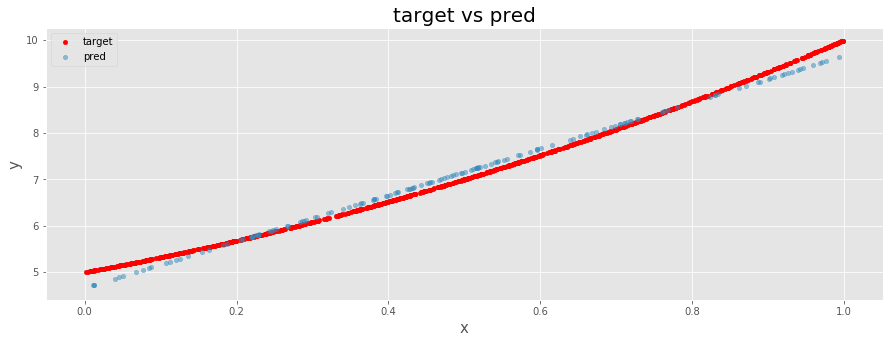

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(15,5))

# chart 1: show the line we try to model
df.plot.scatter(x='x',y='y',ax=axes,color='red')

# chart 2: show the line model came up
df_final.plot.scatter(x='test_x',y='pred',ax=axes,alpha=0.5)

axes.set_title('target vs pred',fontsize=20)
axes.set_xlabel('x',fontsize=15)
axes.set_ylabel('y',fontsize=15)
axes.legend(['target','pred'],loc='best')

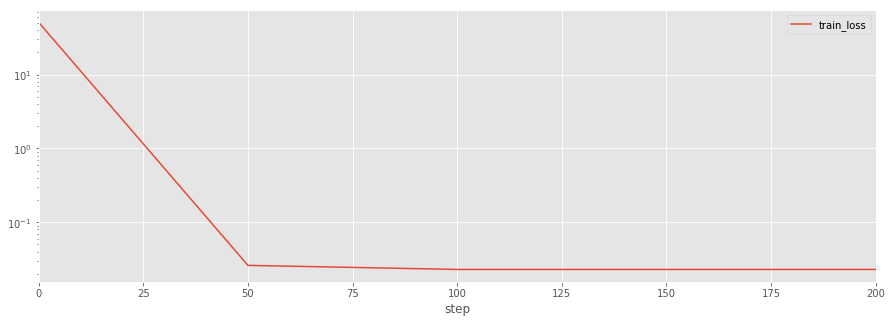

In [21]:
df_loss.set_index('step').plot(logy=True,figsize=(15,5))

# Your Turn  

> Try to increase size of your  hidden layer and see how that affects your model. Note that changing the size of your hidden layer may require you to change the Learning Rate and the number of iterations as well. I have also found that making the hidden layer very very large might not always make things better.

In [34]:
def nn_hidden(hidden=1,lr=0.09,epoch=250):
    # you can adjust the number of neurons in the hidden layer
    hidden_size = hidden

    # placeholders
    # shape[how many sample you have, how many input neorons]
    x = tf.placeholder(tf.float32,shape=[None,1],name='01_x')
    y = tf.placeholder(tf.float32,shape=[None,1],name='01_y')

    # create your first hidden layer
    # tf.truncated_normal([how many samples do you have, size of output layer])
    W1 = tf.Variable(tf.truncated_normal([1,hidden_size],mean=0.1,stddev=0.1),name='w1')

    # tf.truncated_normal([size of output layer])
    b1 = tf.Variable(tf.truncated_normal([hidden_size],mean=0.1,stddev=0.1),name='b1')

    # tf.truncated_normal([size of samples, size of output layer])
    h1 = tf.nn.relu(tf.matmul(x,W1) + b1,name='h1')

    # output layer
    W = tf.Variable(tf.truncated_normal([hidden_size,1],mean=0.1,stddev=0.1),name='w')
    b = tf.Variable(tf.truncated_normal([1],mean=0.1,stddev=0.1),name='b')

    # note that the input comes from our hidden layer
    pred = tf.nn.relu(tf.matmul(h1,W)+b)

    # minimize the square mean error
    loss = tf.reduce_mean(tf.square(pred-y))

    # pick optimizer
    optimizer = tf.train.GradientDescentOptimizer(0.09)
    train = optimizer.minimize(loss)

    # check accuracy of model
    correct_prediction = tf.equal(tf.round(pred),tf.round(y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

    # initial variables
    init = tf.global_variables_initializer()

    # record step and error loss
    t = []

    with tf.Session() as sess:

        sess.run(init)

        # get data
        train_data = {x:train_x,y:train_y}
        test_data = {x:test_x,y:test_y}

        for step in range(epoch):

            # train data in process
            train_loss,train_pred = sess.run([loss,train],feed_dict=train_data)

            if step % 50 == 0:
                # capture step and loss for analysis
                t.append((step,train_loss))

                print("step:%d, loss:%f, accuracy:%f, "%(step,train_loss,accuracy.eval(train_data)))

        print("train accuracy:%f"%(accuracy.eval(train_data)))
        print("test accuracy:%f"%(accuracy.eval(test_data)))

        # capture prediction on test data
        test_result = sess.run(pred,feed_dict={x:test_x})
        df_final = pd.DataFrame({
            'test_x':test_x[:,0],
            'pred':test_result[:,0]
        })

        # capture training and validation loss
        df_loss = pd.DataFrame(t,columns=['step','train_loss'])


    fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(15,5))

    # chart 1: show the line we try to model
    df.plot.scatter(x='x',y='y',ax=axes,color='red')

    # chart 2: show the line model came up
    df_final.plot.scatter(x='test_x',y='pred',ax=axes,alpha=0.5)

    axes.set_title('target vs pred',fontsize=20)
    axes.set_xlabel('x',fontsize=15)
    axes.set_ylabel('y',fontsize=15)
    axes.legend(['target','pred'],loc='best')

    df_loss.set_index('step').plot(logy=True,figsize=(15,5))

step:0, loss:45.793179, accuracy:0.000000, 
step:50, loss:0.316833, accuracy:0.457647, 
step:100, loss:0.049447, accuracy:0.849412, 
step:150, loss:0.024978, accuracy:0.868235, 
step:200, loss:0.022791, accuracy:0.872941, 
step:250, loss:0.022541, accuracy:0.870588, 
step:300, loss:0.022446, accuracy:0.870588, 
step:350, loss:0.022352, accuracy:0.870588, 
step:400, loss:0.022242, accuracy:0.870588, 
step:450, loss:0.022113, accuracy:0.871765, 
step:500, loss:0.021962, accuracy:0.871765, 
step:550, loss:0.021784, accuracy:0.871765, 
step:600, loss:0.021576, accuracy:0.871765, 
step:650, loss:0.021332, accuracy:0.871765, 
step:700, loss:0.021049, accuracy:0.871765, 
step:750, loss:0.020720, accuracy:0.871765, 
step:800, loss:0.020340, accuracy:0.871765, 
step:850, loss:0.019903, accuracy:0.875294, 
step:900, loss:0.019405, accuracy:0.878824, 
step:950, loss:0.018839, accuracy:0.880000, 
step:1000, loss:0.018203, accuracy:0.884706, 
step:1050, loss:0.017493, accuracy:0.887059, 
step:1100,

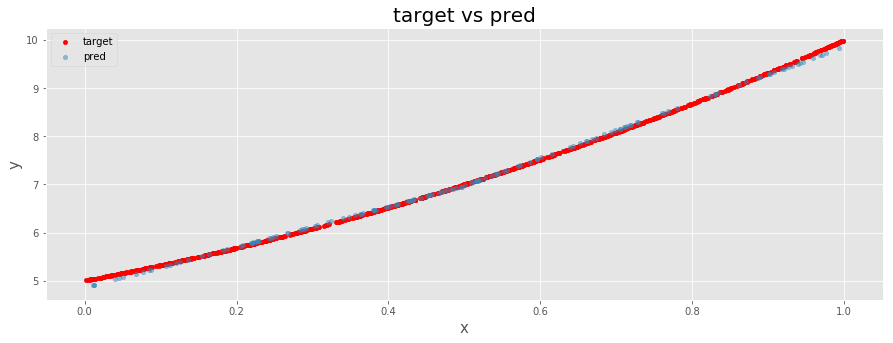

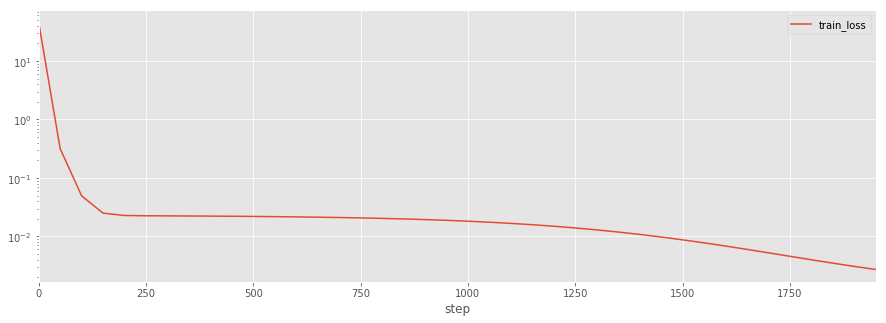

In [52]:
nn_hidden(hidden=20,lr=0.09,epoch=2000)

step:0, loss:47.995800, accuracy:0.000000, 
step:50, loss:0.336095, accuracy:0.444706, 
step:100, loss:0.051575, accuracy:0.834118, 
step:150, loss:0.024882, accuracy:0.870588, 
step:200, loss:0.022415, accuracy:0.875294, 
step:250, loss:0.022065, accuracy:0.870588, 
step:300, loss:0.021878, accuracy:0.871765, 
step:350, loss:0.021678, accuracy:0.871765, 
step:400, loss:0.021448, accuracy:0.871765, 
step:450, loss:0.021179, accuracy:0.871765, 
step:500, loss:0.020868, accuracy:0.871765, 
step:550, loss:0.020508, accuracy:0.871765, 
step:600, loss:0.020094, accuracy:0.871765, 
step:650, loss:0.019620, accuracy:0.877647, 
step:700, loss:0.019082, accuracy:0.878824, 
step:750, loss:0.018474, accuracy:0.880000, 
step:800, loss:0.017793, accuracy:0.885882, 
step:850, loss:0.017039, accuracy:0.889412, 
step:900, loss:0.016213, accuracy:0.892941, 
step:950, loss:0.015318, accuracy:0.896471, 
step:1000, loss:0.014362, accuracy:0.900000, 
step:1050, loss:0.013357, accuracy:0.904706, 
step:1100,

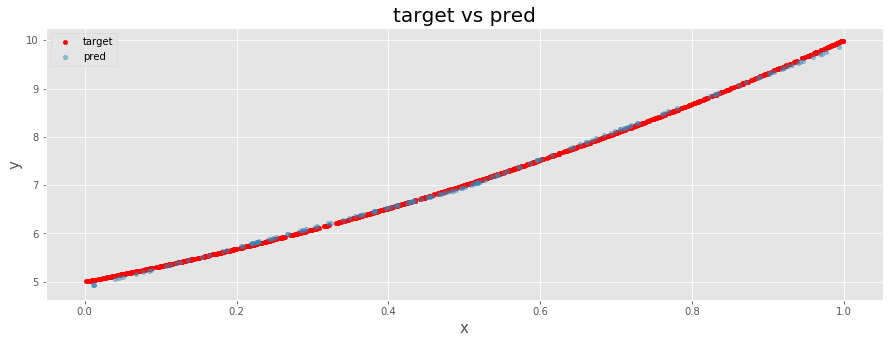

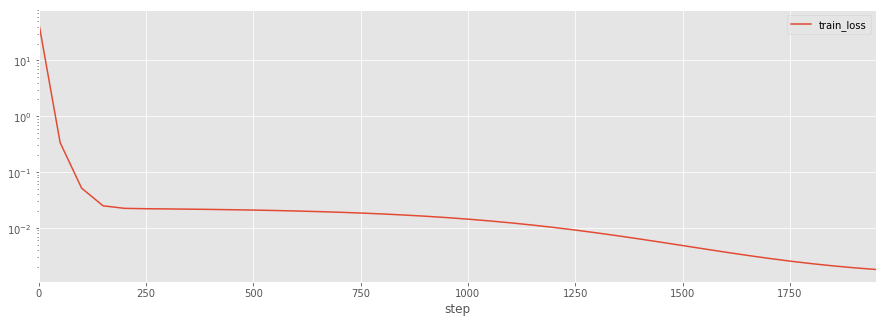

In [50]:
nn_hidden(hidden=20,lr=0.1,epoch=2000)

step:0, loss:30.191631, accuracy:0.000000, 
step:50, loss:0.301792, accuracy:0.467059, 
step:100, loss:0.038165, accuracy:0.863529, 
step:150, loss:0.018438, accuracy:0.892941, 
step:200, loss:0.015679, accuracy:0.895294, 
step:250, loss:0.014460, accuracy:0.902353, 
step:300, loss:0.013366, accuracy:0.904706, 
step:350, loss:0.012265, accuracy:0.912941, 
step:400, loss:0.011156, accuracy:0.918824, 
step:450, loss:0.010056, accuracy:0.927059, 
step:500, loss:0.008986, accuracy:0.927059, 
step:550, loss:0.007963, accuracy:0.931765, 
step:600, loss:0.007005, accuracy:0.932941, 
step:650, loss:0.006125, accuracy:0.937647, 
step:700, loss:0.005332, accuracy:0.949412, 
step:750, loss:0.004632, accuracy:0.954118, 
step:800, loss:0.004025, accuracy:0.957647, 
step:850, loss:0.003507, accuracy:0.960000, 
step:900, loss:0.003073, accuracy:0.967059, 
step:950, loss:0.002715, accuracy:0.968235, 
step:1000, loss:0.002423, accuracy:0.970588, 
step:1050, loss:0.002188, accuracy:0.972941, 
step:1100,

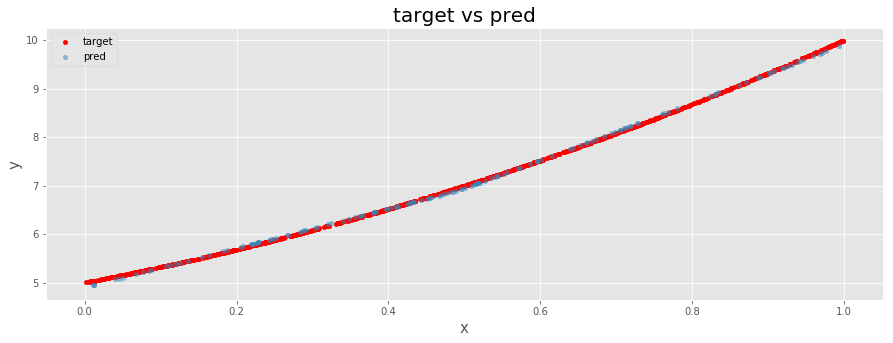

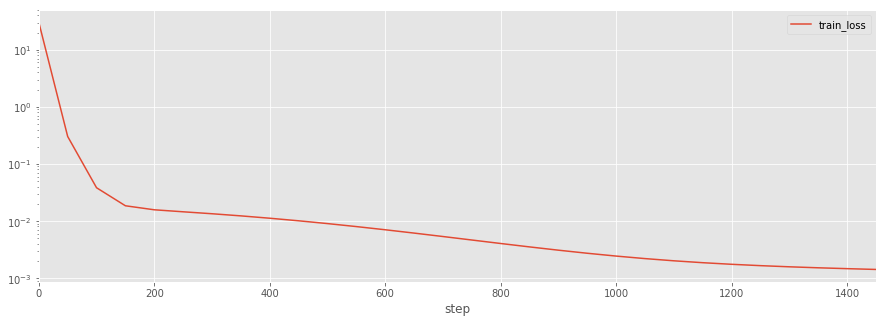

In [57]:
nn_hidden(hidden=100,lr=0.01,epoch=1500)